## Лабораторная работа 1. Разведочный анализ данных. Исследование и визуализация данных.

Задание:
Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.
Для первой лабораторной работы рекомендуется использовать датасет без пропусков в данных, например из Scikit-learn.
Пример преобразования датасетов Scikit-learn в Pandas Dataframe можно посмотреть здесь.
Для лабораторных работ не рекомендуется выбирать датасеты большого размера.

Создать ноутбук, который содержит следующие разделы:
Текстовое описание выбранного Вами набора данных.
Основные характеристики датасета.
Визуальное исследование датасета.
Информация о корреляции признаков.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)

### Описание набора данных

Набор данных `fetch_california_housing()` содержит информацию о жилье в Калифорнии. Данные включают в себя различные характеристики жилья, такие как средний возраст домов, среднее количество комнат, средний доход населения и другие. Целевая переменная — это медианная стоимость дома в данном районе, выраженная в сотнях тысяч долларов.

In [2]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))
data['MedHouseVal'] = housing.target

Всего строк: 20640


### Основные характеристики датасета

In [3]:
print("Размерность данных:", data.shape)
print("\nПервые 5 строк данных:")
print(data.head())
print("\nИнформация о данных и типах:")
print(data.info())
print("\nБазовые статистики:")
print(data.describe())

print("\nКоличество пустых значений по столбцам датасета:")
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Размерность данных: (20640, 9)

Первые 5 строк данных:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Информация о данных и типах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms 

### Визуальное исследование датасета

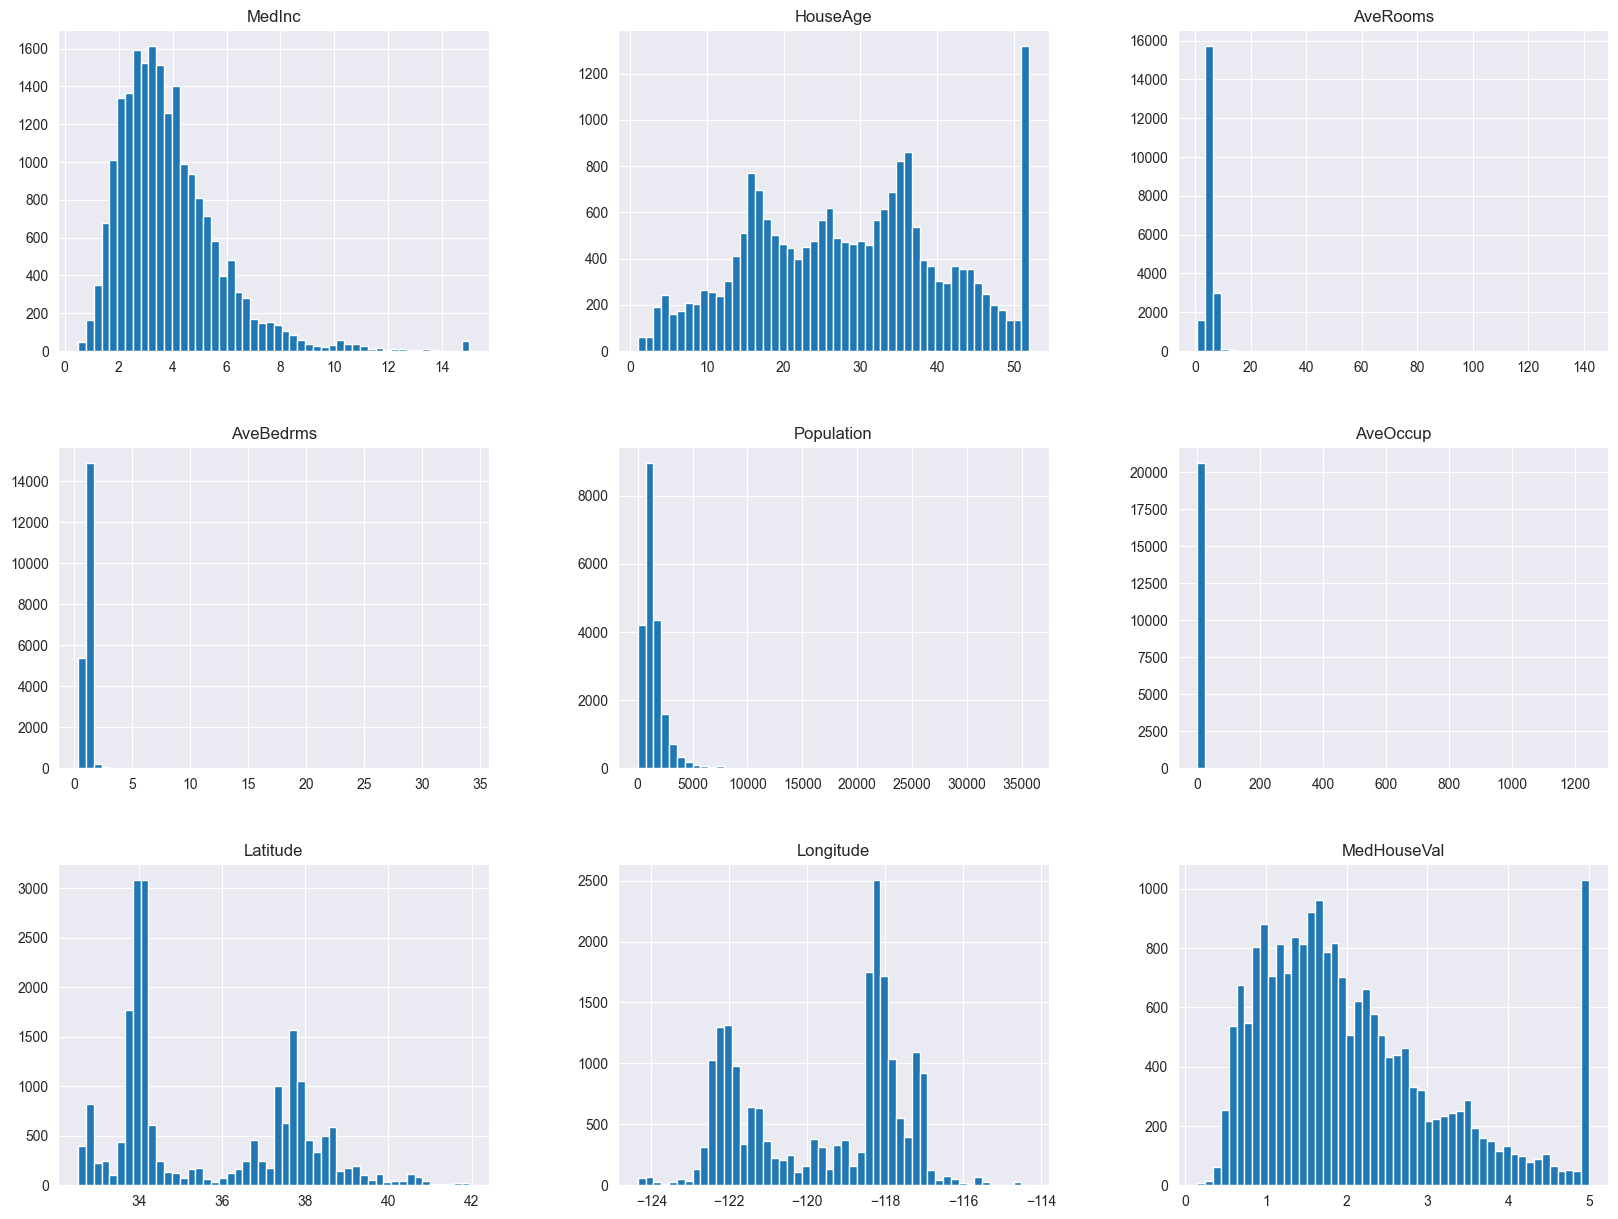

In [4]:
# Гистограммы для всех признаков
data.hist(bins=50, figsize=(20,15))
plt.show()

### Информация о корреляции признаков.

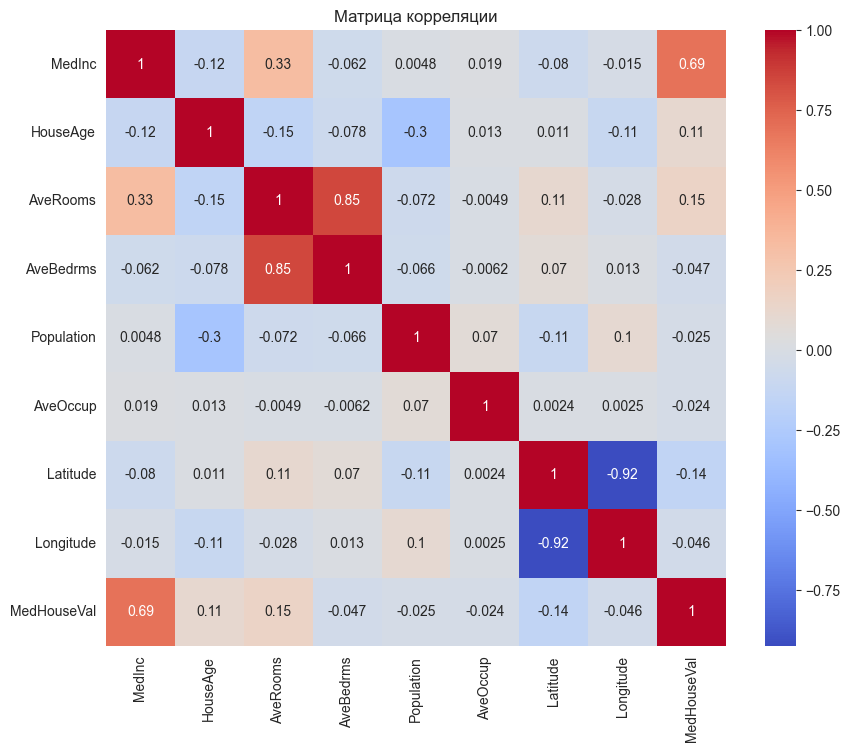


Корреляция с целевой переменной (MedHouseVal):
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


In [5]:
# Матрица корреляции
corr_matrix = data.corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

# Корреляция с целевой переменной
print("\nКорреляция с целевой переменной (MedHouseVal):")
print(corr_matrix['MedHouseVal'].sort_values(ascending=False))
